In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
url = "https://www.gamestar.hu/site/rss/rss.xml"
resp = requests.get(url)
soup = BeautifulSoup(resp.content, features="xml")
#print(soup.prettify())
items = soup.findAll("item")

In [12]:
author=[]
link=[]
ir="0"
tol=0
ig=25
b=0

author_txt = [line.rstrip('\n') for line in open("author.txt")]

for item in items:
    author.append(item.author.text)   

while b < len(author_txt)/25:
    if author == author_txt[tol:ig]:
        #print("egyezés")
        ir = "1"
        break
    else:
        tol+=25
        ig+=25
        b+=1
        #print("nincs")

link_txt = [line.rstrip('\n') for line in open("link.txt")]

for item in items:
    link.append(item.link.text)
        

if ir == "0":
    author = author + author_txt
    #author fájlba írás
    with open('author.txt', 'a') as f:
        for item in author:
            f.write("%s\n" % item)
    link=link+link_txt
    #link fájlba írás
    with open('link.txt', 'a') as f:
        for item in link:
            f.write("%s\n" % item)

else:
    author = author_txt
    link = link_txt
    


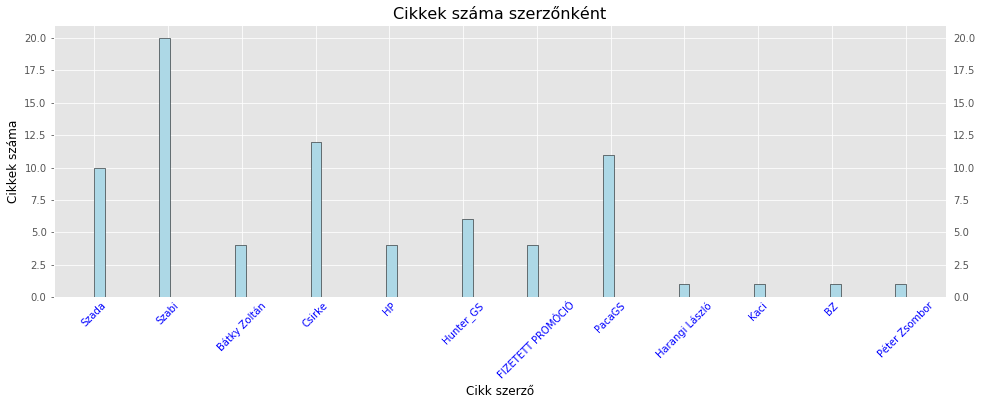

In [13]:
plt.figure(figsize=(16,5))

plt.style.use("ggplot")

plt.xticks(rotation=45)
plt.tick_params(axis='x', colors='blue', length=0)
plt.tick_params(labelright=True)


plt.ylabel("Cikkek száma",fontsize=12,color="black")
plt.xlabel("Cikk szerző",fontsize=12,color="black")
plt.title("Cikkek száma szerzőnként",fontsize=16)
plt.hist(author, bins=len(author), color="lightblue",edgecolor="black")


plt.show()

In [15]:
hon=[]
gamestar=0
pcworld=0
puliwood=0
egyéb=0
for i in link:
    if "gamestar" in i:
      gamestar+=1
    elif "pcworld" in i:
        pcworld+=1
    elif "puliwood" in i:
        puliwood+=1
    else:
        egyéb+=1


hon.append(gamestar)
hon.append(pcworld)
hon.append(puliwood)
hon.append(egyéb)

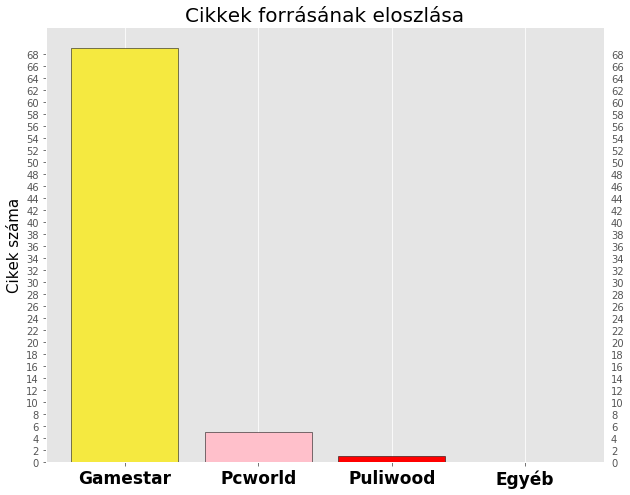

In [16]:
plt.figure(figsize=(10,8))
colors = ["#f5e940", "pink", "red","lightblue"]
long=np.arange(len(["Gamestar","Pcworld","Puliwood","Egyéb"]))

plt.bar(long,hon,color=colors,edgecolor="black")
plt.yticks(np.arange(0,(gamestar+1),step=2))
plt.xticks(long, ["Gamestar","Pcworld","Puliwood","Egyéb"], color='black', fontweight='bold', fontsize='17')
plt.tick_params(labelright=True)

plt.ylabel("Cikek száma",fontsize=15,color="black")
plt.title("Cikkek forrásának eloszlása",fontsize=20)
plt.grid(axis="y")

plt.show()

In [25]:
SzavakSzama=[]
db=0
j=0
while j<len(link):
    db=0
    resp = requests.get(link[j])
    soup = BeautifulSoup(resp.content, features="html.parser")
    table = soup.find("div", class_="content")
    rows = table.find_all("p")
    columns = [v.text for v in rows[0].find_all("p")]
    for i in columns:
        db+=len(i.split())   
    SzavakSzama.append(db)
    j+=1


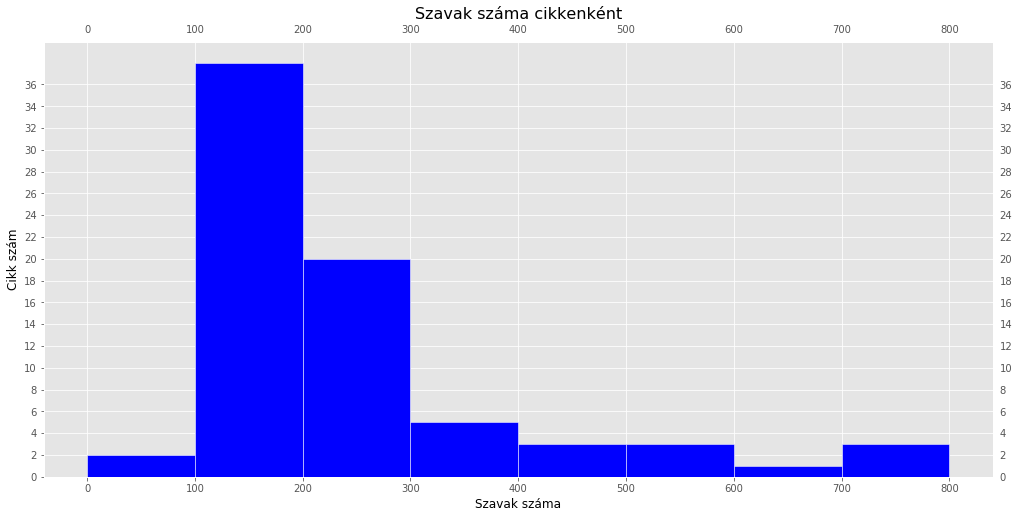

In [19]:
xten=[]
for i in range(0,(max(SzavakSzama)+100),100):
    xten.append(i)

plt.figure(figsize=(17,8))


plt.hist(SzavakSzama,bins=xten, color="blue",edgecolor="white")

plt.xticks(xten)
plt.yticks(np.arange(0,(len(SzavakSzama)//2),step=2))
plt.xlabel("Szavak száma",fontsize=12,color="black")
plt.ylabel("Cikk szám",fontsize=12,color="black")
plt.title("Szavak száma cikkenként",fontsize=16)

plt.tick_params(labeltop=True, labelright=True)


plt.show()

In [20]:
Szerzo_N=[]
Szerzo_Sz=[]

i=0
k=0

while i<len(author):
    k=0
    if i==0:
        Szerzo_N.append(author[i])
        Szerzo_Sz.append(SzavakSzama[i])
        i+=1
    else:
        while k<len(Szerzo_N):
            if Szerzo_N[k] != author[i]:
                uj_e="uj"
                k+=1
            else:
                uj_e="nem_uj"
                Szerzo_Sz[k]=Szerzo_Sz[k]+SzavakSzama[i]
                break
        if uj_e=="uj":
            Szerzo_N.append(author[i])
            Szerzo_Sz.append(SzavakSzama[i])
            i+=1
        else:
            i+=1
                

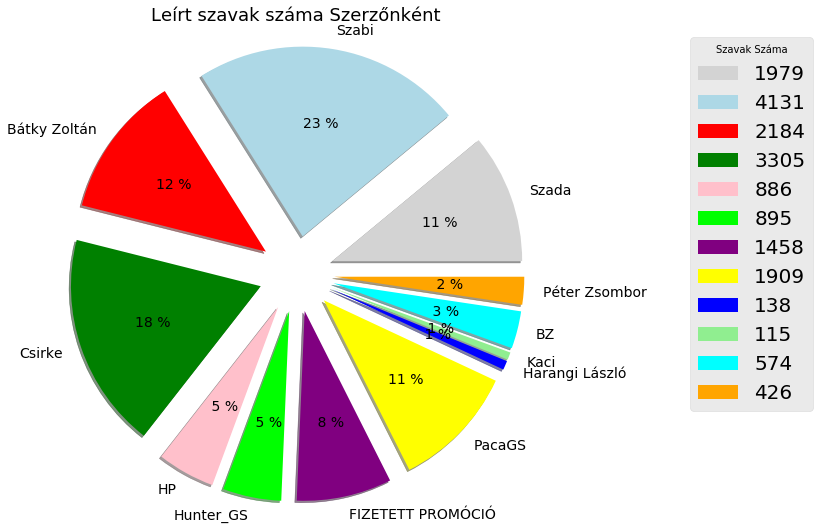

In [21]:
plt.figure(figsize=(9,9))
colors = ["lightgrey", "lightblue","red","green", "pink","lime","purple", "yellow","blue", "lightgreen","cyan","orange" ,"grey"]

explode=[.4]*len(Szerzo_N)
plt.pie(Szerzo_Sz, labels=Szerzo_N, colors=colors, autopct="%2.f %%", explode=explode, shadow=True,radius=2,
        textprops={'fontsize': 14})

plt.axis("equal")
plt.legend(Szerzo_Sz,bbox_to_anchor=(1.55,1),title="Szavak Száma",prop={"size":20})


plt.title("Leírt szavak száma Szerzőnként",fontsize=18)
plt.show()

In [22]:
AtlagSzo=[]
m=0
while m < len(Szerzo_N):
    AtlagSzo.append("{:.2f}".format(Szerzo_Sz[m]/(author.count(Szerzo_N[m]))))
    m+=1

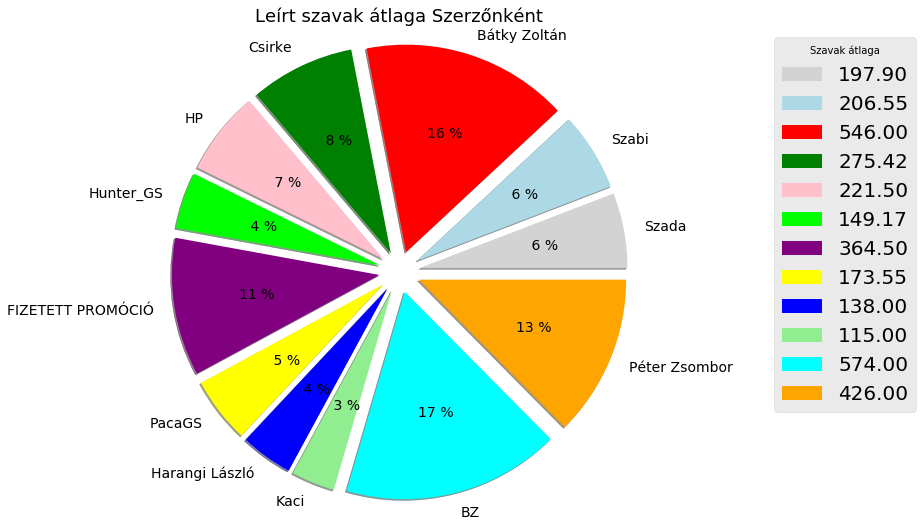

In [23]:
plt.figure(figsize=(9,9))
colors = ["lightgrey", "lightblue","red","green", "pink","lime","purple", "yellow","blue", "lightgreen","cyan","orange" ,"grey"]

explode=[.3]*len(Szerzo_N)
plt.pie(AtlagSzo, labels=Szerzo_N, colors=colors, autopct="%2.f %%", explode=explode, shadow=True,radius=3,
        textprops={'fontsize': 14})

plt.axis("equal")
plt.legend(AtlagSzo,bbox_to_anchor=(1.55,1),title="Szavak átlaga",prop={"size":20})


plt.title("Leírt szavak átlaga Szerzőnként",fontsize=18)
plt.show()